## Preparando o ambiente de trabalho

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 12.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=560a3071eb7a76654df136c62fb0697ae7558ae8bb9c03d995448e3a0fdf3831
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
          .master('local[*]')\
          .appName('Sistema de Recomendação')\
          .getOrCreate()

spark

In [ ]:
from google.colab import drive
drive.mount('my-drive')

Mounted at my-drive


## Dicionário de dados (API do Spotify)

- **Acousticness/Acústica:** variável numérica; medida de confiança de 0,0 a 1,0 se a faixa é acústica. O 1.0 representa alta confiança de que a faixa é acústica.

- **Danceability/Dançabilidade:** variável numérica; a dançabilidade descreve o quão adequada uma faixa é para dançar com base em uma combinação de elementos musicais, incluindo tempo, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é o menos e 1,0 é o mais dançável.

- **Duration_ms:** variável numérica; a duração da trilha em milissegundos.

- **Duration_min:** variável numérica; a duração da faixa em minutos.

- **Energy/Energia:** variável numérica; energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, o death metal tem alta energia, enquanto um prelúdio de Bach tem uma pontuação baixa na escala. As características perceptivas que contribuem para este atributo incluem faixa dinâmica, intensidade percebida, timbre, taxa de início e entropia geral.

- **Explicit/Explícito:** variável categórica; se a faixa tem ou não letras explícitas (verdadeiro = sim (1); falso = não(0), não OU desconhecido).

- **Id:** o ID do Spotify para a faixa.

- **Instrumentalness/Instrumentalidade:** variável numérica; prevê se uma faixa não contém vocais. Os sons “Ooh” e “aah” são tratados como instrumentais neste contexto. Faixas de rap ou de palavras faladas são claramente “vocais”. Quanto mais próximo o valor de instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter conteúdo vocal. Valores acima de 0,5 destinam-se a representar faixas instrumentais, mas a confiança é maior à medida que o valor se aproxima de 1,0.

- **Key/Chave:** variável numérica; a chave geral estimada da faixa. Os inteiros são mapeados para pitchs usando a notação padrão de Pitch Class. Por exemplo, 0 = C, 1 = C#/Db, 2 = D, e assim por diante. Se nenhuma chave foi detectada, o valor é -1.

- **Liveness/Ao vivo:** variável numérica; detecta a presença de um público na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido executada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa.

- **Loudness/Volume em dB:** variável numérica; volume geral de uma faixa em decibéis (dB). Os valores de volume são calculados em média em toda a faixa e são úteis para comparar o volume relativo das faixas. A sonoridade é a qualidade de um som em relação à sua amplitude (“altura”), por medir a relação entre os picos e depressões de uma onda sonora. Os valores típicos variam entre -60 e 0 db.

- **Mode/Modo:** variável numérica; o modo indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual seu conteúdo melódico é derivado. Maior é representado por 1 e menor é 0.

- **Popularity/Popularidade:** variável numérica; a popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de execuções que a faixa teve e quão recentes são essas execuções.

- **Speechiness/Fala:** variável numérica; detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente falada a gravação (por exemplo, talk show, audiolivro, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como música estilo rap. Os valores abaixo de 0,33 provavelmente representam músicas e outras faixas que não são de fala.

- **Tempo:** variável numérica; tempo estimado geral de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida.

- **Valence/Valência:** variável numérica; medida de 0,0 a 1,0 descrevendo a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (como, triste, deprimida, irritada).

- **Year/Ano:** ano em que a música foi lançada.

## Leitura dos dados

In [ ]:
dados = spark.read.csv(
    path = '/content/my-drive/MyDrive/Colab_Notebooks/Alura-CursoSparkSistemaDeRecomendacao/dados_musicas.csv',
    header=True,
    inferSchema=True,
    sep=';'
)

- Explorando algumas características principais do nosso conjunto de daods

In [ ]:
dados.show(5)

+------------------+----+------------+------------+------------+-----------+------------------+--------+--------------------+----------------+---+--------+-------------------+----+-------------------+----------+-----------+-------+--------------------+
|           valence|year|acousticness|     artists|danceability|duration_ms|            energy|explicit|                  id|instrumentalness|key|liveness|           loudness|mode|               name|popularity|speechiness|  tempo|        artists_song|
+------------------+----+------------+------------+------------+-----------+------------------+--------+--------------------+----------------+---+--------+-------------------+----+-------------------+----------+-----------+-------+--------------------+
|             0.285|2000|     0.00239|    Coldplay|       0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|         1.21E-4| 11|   0.234|             -7.227|   1|             Yellow|        84|     0.0281|173.372|   Coldpla

In [ ]:
dados.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [ ]:
# quantidade de registros armazenada no conjunto
dados.count()

20311

In [ ]:
# quantidade de colunas
len(dados.columns)

19

In [ ]:
# maneira alternativa de consultar o schema:
dados.dtypes

[('valence', 'double'),
 ('year', 'int'),
 ('acousticness', 'double'),
 ('artists', 'string'),
 ('danceability', 'double'),
 ('duration_ms', 'int'),
 ('energy', 'double'),
 ('explicit', 'int'),
 ('id', 'string'),
 ('instrumentalness', 'double'),
 ('key', 'int'),
 ('liveness', 'double'),
 ('loudness', 'double'),
 ('mode', 'int'),
 ('name', 'string'),
 ('popularity', 'int'),
 ('speechiness', 'double'),
 ('tempo', 'double'),
 ('artists_song', 'string')]

In [ ]:
# verificação de dados nulos
from pyspark.sql import functions as f

dados.select([f.count(f.when(f.isnull(c),1)).alias(c) for c in dados.columns ]).show()

+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [ ]:
# após observar o .show das 5 primeiras linhas pudemos observar apenas o ano 2000
# será que só existe esse ano na nossa base? ou existem outros?

dados.select('year').distinct().orderBy('year',ascending=True).collect()

# o método 'collect' transforma o resultado da query em uma lista (pode ser útil em determinadas situações)
# nesse caso, por exemplo, o resultado da query contém 21 linhas, mas se usássemos o método 'show' para
# verificar o resultado final como um dataframe propriamente dito, veríamos apenas os 20 primeiras

[Row(year=2000),
 Row(year=2001),
 Row(year=2002),
 Row(year=2003),
 Row(year=2004),
 Row(year=2005),
 Row(year=2006),
 Row(year=2007),
 Row(year=2008),
 Row(year=2009),
 Row(year=2010),
 Row(year=2011),
 Row(year=2012),
 Row(year=2013),
 Row(year=2014),
 Row(year=2015),
 Row(year=2016),
 Row(year=2017),
 Row(year=2018),
 Row(year=2019),
 Row(year=2020)]

In [ ]:
# pelo fato de transformar a saída da query em uma lista, o collect permite ainda que os tratamentos usuais de listas (nesse caso matrizes) sejam efetuados
# por exemplo:

dados.collect()[4][:10000] # coletando os registros da 4 linha, das colunas 0 até 10000 (nesse caso tudo)


(0.76,
 2000,
 0.0302,
 'Eminem',
 0.949,
 284200,
 0.6609999999999999,
 1,
 '3yfqSUWxFvZELEM4PmlwIR',
 0.0,
 5,
 0.0454,
 -4.244,
 0,
 'The Real Slim Shady',
 80,
 0.0572,
 104.504,
 'Eminem - The Real Slim Shady')

In [ ]:
# verificando a quantidade de músicas que temos para cada ano 

dados.select('year').groupBy('year').count().orderBy('year').show()

+----+-----+
|year|count|
+----+-----+
|2000|  867|
|2001|  932|
|2002| 1003|
|2003|  908|
|2004|  943|
|2005|  951|
|2006|  958|
|2007|  944|
|2008|  900|
|2009|  972|
|2010| 1059|
|2011|  979|
|2012|  994|
|2013|  986|
|2014|  927|
|2015| 1021|
|2016|  855|
|2017|  969|
|2018| 1080|
|2019|  913|
+----+-----+
only showing top 20 rows



- Uma pergunta bacana que pode ser feita é: será que as músicas ficaram mais energéticas à medida que o tempo foi passando?

In [ ]:
dados_anos = spark.read.csv(
    path = '/content/my-drive/MyDrive/Colab_Notebooks/Alura-CursoSparkSistemaDeRecomendacao/dados_musicas_ano.csv',
    header=True,
    inferSchema=True,
    sep=','
)

dados_anos.show(5)

+----+----+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|      danceability|       duration_ms|             energy|   instrumentalness|          liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005|0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|           0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748|0.4820422535211267|165469.74647887325|0.237815

In [ ]:
dados_anos.printSchema()

root
 |-- mode: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: double (nullable = true)
 |-- energy: double (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- valence: double (nullable = true)
 |-- popularity: double (nullable = true)
 |-- key: integer (nullable = true)



In [ ]:
# reduzindo a base apenas para anos posteriores a 2000
dados_anos = dados_anos.filter(f.col('year') >= 2000)
dados_anos.show(5)

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-----------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|          loudness|        speechiness|             tempo|           valence|       popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+-----------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853|-8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991| 46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.6269855221945144|

In [ ]:
dados_anos.count()

21

In [ ]:
len(dados_anos.columns)

14

In [ ]:
dados.dtypes

[('valence', 'double'),
 ('year', 'int'),
 ('acousticness', 'double'),
 ('artists', 'string'),
 ('danceability', 'double'),
 ('duration_ms', 'int'),
 ('energy', 'double'),
 ('explicit', 'int'),
 ('id', 'string'),
 ('instrumentalness', 'double'),
 ('key', 'int'),
 ('liveness', 'double'),
 ('loudness', 'double'),
 ('mode', 'int'),
 ('name', 'string'),
 ('popularity', 'int'),
 ('speechiness', 'double'),
 ('tempo', 'double'),
 ('artists_song', 'string')]

In [ ]:
# para visualizar a dependência das principais características das músicas com o andamento dos anos podemos
# construir um gráfico

# o primeiro passo aqui é converter para Pandas (como temos pouco dados aqui, não tem problema)
# ps.: sempre que quisermos construir gráficos com o seaborn / matplotlib, precisamos fazer a conversão para o pandas

In [ ]:
import plotly.express as px

fig = px.line(dados_anos.toPandas(), x='year', y='loudness', markers=True, title='Variação do loudness em função dos anos')
fig.show()

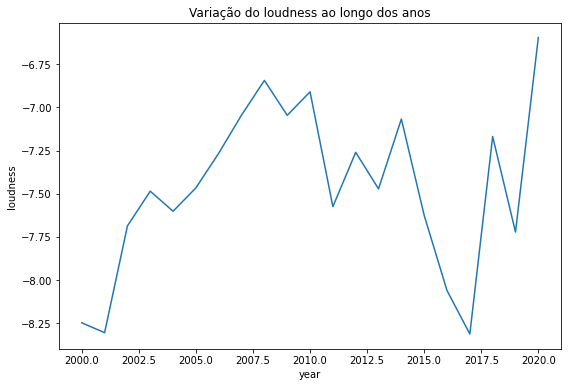

In [ ]:
# Produzindo o mesmo resultado com o seaborn
import seaborn as sns 
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,6))
fig = sns.lineplot(data= dados_anos.toPandas(), x='year', y='loudness')
plt.title('Variação do loudness ao longo dos anos')
plt.show()

- Podemos ver que há assim um aumento do loudness à medida que os anos foram passando, mas as flutuações foram bem altas também. Ainda não podemos concluir se esse resultado é, de fato, uma tendência, ou se é só uma coincidência.

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
temp = dados_anos.toPandas() # dataframe temporário
#fig.add_trace(go.Scatter(x=tmp['year'], y=tmp['acousticness'], name='acousticness'))

# verificação das demais características
fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'], name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'], name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'], name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'], name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'], name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'], name='Speechiness'))

fig.show()

- É possível notar que o impacto dos anos nas músicas parece pequeno. Temos algumas flutuações, mas não parecem ter relação com a passagem do tempo. Por exemplo, as músicas não estão ficando mais "energéticas" ao longo do tempo. Existe uma variação, mas não está relacionada aos anos.

- Essa é uma informação importante, mas que nos traz outra dúvida: qual impacto as características das músicas têm sobre elas mesmas? Uma música energética, por exemplo, pode ser acústica? Esses aspectos podem caminhar juntos?

- Para entender o impacto de uma feature sobre a outra, precisamos aplicar a construção de uma matriz de correlação (importante parêmetro estatístico que serve para avaliar o grau de dependência / relacionamento entre duas variáveis em estudo)

In [ ]:
# exibindo a matriz de correlação com o plotly.express 
fig = px.imshow(dados_anos.toPandas().corr(), text_auto=True)

# o dataframe pandas já tem um método de cálculo da correlação entre as variáveis do dataframe em estudo (.corr),
# que toma o conjunto de dados fornecidos e já retorna a matriz de correlação apropriada

fig.show()

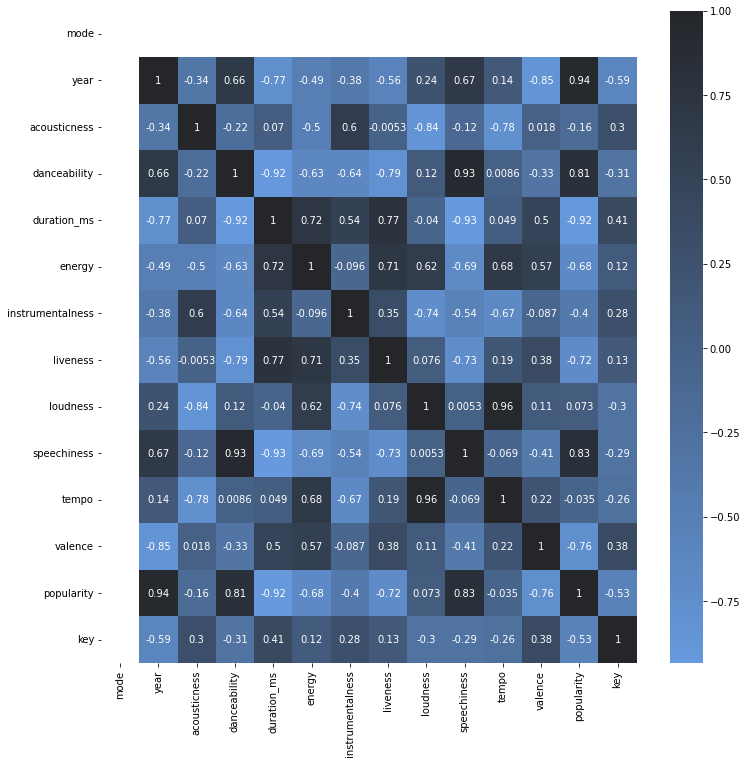

In [ ]:
# produzindo o mesmo resultado com o seaborn
fig = plt.figure(figsize=(12,12))
cmap_azulado = sns.dark_palette("#69d", reverse=True, as_cmap=True)
fig = sns.heatmap(dados_anos.toPandas().corr(), cmap=cmap_azulado, cbar=True, annot=True)
plt.show()

In [ ]:
# podemos notar que há regiões em branco associadas à coluna "mode"
# isso significa que, dados os valores registrados para essa coluna no dataset, o algoritmo 
# não está conseguindo efetuar os cálculos de correlação apropriados

# então, o que vamos fazer aqui é dropar essa coluna e refazer os processos
dados_anos = dados_anos.drop('mode')
fig = px.imshow(dados_anos.toPandas().corr(), text_auto=True)

In [ ]:
fig.show()

- Podemos verificar alguns dados interessantes. Por exemplo:
  - Todas os valores da diagonal principal de correlação 1. Lógico: uma dada variável deve ser totalmente e diretamente correlacionada consigo mesma (teste de sanidade)
  - O cruzamento energia/acusticidade, por exemplo. Podemos verificar uma correlação de ~0.96, o que indica que quanto mais alta uma música é, menos acústica ela será, e vice-versa. 
  - O cruzamento energia/ano também fornece uma informação interessante. Temos um valor de ~0.93, o que indica que, de fato, à medida que os anos vão passando (aumentando em número) o valor médio da energia tende também a aumentar.

- Muitas colunas estão bastante correlacionadas e isso é um fato. Para diversos modelos de Machine Learning isso é um problema (devido ao fenômeno da **multicolinearidade**), mas para o nosso sistema recomendador de músicas ainda é necessário avaliar se faz sentido ter colunas (features) de elevada correlação (seja ela positiva/negativa) ou não

## Clusterização por gênero

In [ ]:
dados_generos = spark.read.csv(
    path='/content/my-drive/MyDrive/Colab_Notebooks/Alura-CursoSparkSistemaDeRecomendacao/dados_musicas_genero.csv',
    sep=',',
    header=True,
    inferSchema=True
)

In [ ]:
dados_generos.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [ ]:
dados_generos.count()

2973

In [ ]:
dados_generos.select('genres').distinct().count()

2973

- Ou seja: nosso dataset contém um gênero musical diferente para cada linha
(o número total de linhas é igual ao número total de gêneros distintos)

In [ ]:
len(dados_generos.columns)

14

- Desejamos entender se essas informações (colunas) sobre as músicas agruparão adequadamente os gêneros musicais. O ideal é exibir essas informações de forma gráfica para que seja possível fazer a análise.

- O primeiro passo é utilizar uma técnica que consiga reduzir essas 14 informações em 2, assim poderemos plotá-las e visualizá-las num plano cartesiano. Isso nos permitirá descobrir como os dados estão se comportando. Podemos usar uma técnica chamada PCA (Análise de Componentes Principais). Ela cria componentes que representarão as variações dos dados.

- Um ponto importante sobre a técnica PCA é que ela é sensível à escala dos dados. Retornando à nossa base de dados, notaremos flutuações grandes. Por exemplo, na duração da música, que está em milissegundos, temos valores que alcançam 160 mil, enquanto na dançabilidade temos valores que estão apenas na escala dos decimais (0.1, 0.2, 0.7, etc). Enfim, as escalas estão bem diferentes das nossas colunas.

- Para que isso não afete a performance do nosso PCA, aplicaremos outra técnica chamada Standardscaler, que vai fazer uma conta, permitindo que todas as nossas colunas estejam na mesma escala.

In [ ]:
# Para iniciar a análise, começaremos vetorizando as features do nosso dataset
from pyspark.ml.feature import VectorAssembler

In [ ]:
X = dados_generos.columns
X.remove('genres')
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [ ]:
vec_ass = VectorAssembler(inputCols=X, outputCol='features')
dados_generos_vector = vec_ass.transform(dados_generos).select('features', 'genres')
dados_generos_vector.show(5)

+--------------------+--------------------+
|            features|              genres|
+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|
|[1.0,0.49478,0.29...|               432hz|
|[1.0,0.762,0.7120...|               8-bit|
|[1.0,0.6514170195...|                  []|
|[1.0,0.6765573049...|          a cappella|
+--------------------+--------------------+
only showing top 5 rows



In [ ]:
# ainda falta fazer a normalização dos nossos dados para evitar os eventuais problemas com o método PCA
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
scaler_model = scaler.fit(dados_generos_vector)
# aqui é necessário fazer um ajuste do dataset para que o algoritmo possa fazer os cálculos 
# necessários e aplicar a normalização das features

dados_generos_scaler = scaler_model.transform(dados_generos_vector)
dados_generos_scaler.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                                                                                                                   |genres                |scaled_features                                                                                                                                                                                                                                       |
+---------------

In [ ]:
dados_generos_scaler.select('features').collect()[1][0]

DenseVector([1.0, 0.4948, 0.2993, 1048887.3333, 0.4507, 0.4778, 0.131, -16.854, 0.0768, 120.2857, 0.2218, 52.5, 5.0])

A padronização das features feita pelo StandardScaler é feita da seguinte maneira:

$$
  y = \frac{x- \mu}{\sigma}
$$

sendo $x$ o valor inicial da feature, $\mu$ o valor médio total (contabilizando todos os registros do dataset)  e $\sigma$ o desvio-padrão total (contabilizando também todos os registros do dataset)

$$
  \mu = \frac{1}{N} \cdot \sum_{i=1}^{N} x_i
$$

$$
  \sigma = \sqrt{\frac{1}{N}\cdot\sum_{i=1}^{N}(x_i - \mu)^2}
$$

nas quais $N$ representa a quantidade total de dados em análise.

In [ ]:
# Uma vez feitos esses procedimentos, começamos a construir o PCA dos nosso dados
from pyspark.ml.feature import PCA

pca = PCA(k = 2 , inputCol='scaled_features', outputCol='pca_features')
# o parâmetro k representa a quantidade de campos que o modelo pca gere a partir das features incluídas no campo inputCol

model_pca = pca.fit(dados_generos_scaler) # ajuste da classe aos nosso dados (aplicação do algoritmo)
dados_generos_pca = model_pca.transform(dados_generos_scaler)

In [ ]:
dados_generos_pca.select('pca_features').show(truncate=False)

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[2.5070953668885667,0.43816913737697943] |
|[-0.5969679056633488,4.981612052751348]  |
|[-4.158460276223561,-0.8366525081079943] |
|[-2.387344878512217,-0.4877989015663404] |
|[-2.6501218371679083,-0.5756819768820474]|
|[-1.496509120336763,1.8644183183717797]  |
|[-3.923520772157324,0.2851835002352836]  |
|[-4.611011109831114,-0.6783790472312378] |
|[-2.837690063084229,-0.5712993716580518] |
|[-2.706690139892783,-1.25937880797083]   |
|[-4.6983313839242875,1.2765569680619446] |
|[-3.375987496679868,0.7560741064307471]  |
|[-5.608998877066021,1.0427311644393213]  |
|[0.2954946352117687,-0.2763864586236301] |
|[-2.5725591062870428,-1.3169815431109795]|
|[-3.4008228020493454,0.5073029625781897] |
|[-4.366720316263419,-0.3364827059771091] |
|[-2.7254698167724003,0.5058604987046365] |
|[-4.958112358381605,1.2627579957290729]  |
|[-3.6934951846422712,1.38227620

In [ ]:
# Antes de continuar, vamos salvar os procedimentos efetuados num pipeline para que essas etapas possam ser replicadas
# futuramente sem maiores dificuldades

from pyspark.ml import Pipeline

pca_pipeline = Pipeline(stages=[
    VectorAssembler(inputCols = X, outputCol='features'),
    StandardScaler(inputCol='features', outputCol='scaled_features'),
    PCA(k=2, inputCol='scaled_features', outputCol='pca_features')
])

pca_pipeline_model = pca_pipeline.fit(dados_generos) # por exemplo

In [ ]:
dados_generos_pca = pca_pipeline_model.transform(dados_generos)

In [ ]:
dados_generos_pca.select('pca_features').show(truncate=False) 

# mesmo resultado obtido anteriormente, com a vantagem de que não precisamos mais ficar rodando as etapas célula a célula;
# dado o conjunto de dados bruto já temos uma saída com todos os tratamentos necessários

+-----------------------------------------+
|pca_features                             |
+-----------------------------------------+
|[2.5070953668885667,0.43816913737697943] |
|[-0.5969679056633488,4.981612052751348]  |
|[-4.158460276223561,-0.8366525081079943] |
|[-2.387344878512217,-0.4877989015663404] |
|[-2.6501218371679083,-0.5756819768820474]|
|[-1.496509120336763,1.8644183183717797]  |
|[-3.923520772157324,0.2851835002352836]  |
|[-4.611011109831114,-0.6783790472312378] |
|[-2.837690063084229,-0.5712993716580518] |
|[-2.706690139892783,-1.25937880797083]   |
|[-4.6983313839242875,1.2765569680619446] |
|[-3.375987496679868,0.7560741064307471]  |
|[-5.608998877066021,1.0427311644393213]  |
|[0.2954946352117687,-0.2763864586236301] |
|[-2.5725591062870428,-1.3169815431109795]|
|[-3.4008228020493454,0.5073029625781897] |
|[-4.366720316263419,-0.3364827059771091] |
|[-2.7254698167724003,0.5058604987046365] |
|[-4.958112358381605,1.2627579957290729]  |
|[-3.6934951846422712,1.38227620

- Sequência de testes do algoritmo StandardScaler (dúvida)

In [ ]:
#dados_generos_scaler.select('features', 'scaled_features').show(10)

In [ ]:
#dados_generos_scaler.select('features').collect()[0][0][0]

In [ ]:
# armazeno todos os valores da primeira feature  numa lista (só pode assumir 0 ou 1)
qtd_registros = dados_generos_scaler.count() # verifico a quantidade de registros no dataframe
lista_auxiliar = [] # defino uma lista auxiliar

#for i in range(qtd_registros): # para cada linha do dataframe
  #lista_auxiliar.append(dados_generos_scaler.select('features').collect()[i][0][0])
  # guardo todos os valores da primeira feature, em cada linha, numa lista auxiliar

#print(lista_auxiliar[:10]) # print dos 10 primeiros valores

In [ ]:
# faço o import da biblioteca de estatística do python
import statistics as s 

#mean = s.mean(lista_auxiliar) # calculo a média da feature em estudo
#std = s.stdev(lista_auxiliar) # o desvio padrão da feature em estudo

# caso x = 0
#x = dados_generos_scaler.select('features').collect()[8][0][0]
#x_scaled = dados_generos_scaler.select('scaled_features').collect()[8][0][0]

# faço o cálculo de padronização
#y = (x - mean)/std

#print('Valor inicial da feature: {}'.format(x))
#print('Valor padronizado pelo algoritmo: {}'.format(x_scaled))
#print('Valor padronizado manualmente: {}'.format(y))

- Fim da sequência de testes do algoritmo StandardScaler (dúvida)

## Algoritmo K-means

- O funcionamento do algoritmo de clusterização k-means pode ser visualizado / entendido muito mais facilmente com o auxílio [desse simulador online](https://user.ceng.metu.edu.tr/~akifakkus/courses/ceng574/k-means/)

- [Esse artigo](https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0) também possui muitas explicações bacanas sobre o clustering

In [ ]:
# import da classe de trabalho
from pyspark.ml.clustering import KMeans

SEED=1224
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca', k=5, seed=SEED)
# nessa etapa do código, o parâmetro "k" representa a quantidade de clusters que estamos querendo construir

# o parâmetro da seed está associado ao caráter de aleatoriedade do algoritmo e serve para que possamos
# replicar os resultados sempre que o código for executado

kmeans_model = kmeans.fit(dados_generos_pca) # ajuste do kmeans aos nossos dados
prediction_kmeans = kmeans_model.transform(dados_generos_pca) # aplicação da transformação correspondente ao ajuste feito pelo algoritmo

In [ ]:
prediction_kmeans.select('pca_features', 'cluster_pca').show(n=5, truncate=False)

+-----------------------------------------+-----------+
|pca_features                             |cluster_pca|
+-----------------------------------------+-----------+
|[2.5070953668885667,0.43816913737697943] |2          |
|[-0.5969679056633488,4.981612052751348]  |2          |
|[-4.158460276223561,-0.8366525081079943] |4          |
|[-2.387344878512217,-0.4877989015663404] |0          |
|[-2.6501218371679083,-0.5756819768820474]|0          |
+-----------------------------------------+-----------+
only showing top 5 rows



- Essa é a transformação mais importante do nosso conjunto de dados. A coluna 'pca_features' contém, para cada linha, a informação de todos os registros do nosso conjunto armazenada em dois campos (duas variáveis, i.e., duas dimensões), enquanto a coluna 'cluster_pca' contém a indicação de em qual cluster o registro em verificação se encontra.

- No caso desse presente estudo, os clusters (ou grupamentos) se referem aos gêneros musicais (que é o tema dos nossos dados desde o princípio). Até o momento não conseguimos saber quem é quem, mas já é possível inferir alguns resultados. Por exemplo, podemos concluir que o primeiro e o segundo registros pertencem ao mesmo gênero, já que se encontram no mesmo cluster.

## Representação gráfica do clustering

In [ ]:
# a primeira coisa a se fazer é quebrar os registros da coluna de pca em duas colunas distintas
from pyspark.ml.functions import vector_to_array

pca_features_xy = prediction_kmeans.withColumn('x', vector_to_array(f.col('pca_features'))[0] )\
                                   .withColumn('y', vector_to_array(f.col('pca_features'))[1] )\
                                   .select('x', 'y', 'cluster_pca', 'genres')

# a função vector_to_array nos ajuda a pegar os dados da coluna pca e quebrá-los em duas colunas distintas
# no caso, estamos escolhando o primeiro registro (índice 0) para ser a label x e o segundo registro
# (índice 1) para ser o label y

In [ ]:
pca_features_xy.show(5)

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|              genres|
+-------------------+-------------------+-----------+--------------------+
| 2.5070953668885667|0.43816913737697943|          2|21st century clas...|
|-0.5969679056633488|  4.981612052751348|          2|               432hz|
| -4.158460276223561|-0.8366525081079943|          4|               8-bit|
| -2.387344878512217|-0.4877989015663404|          0|                  []|
|-2.6501218371679083|-0.5756819768820474|          0|          a cappella|
+-------------------+-------------------+-----------+--------------------+
only showing top 5 rows



In [ ]:
# uma vez feita essa manipulação, podemos construir uma representação gráfica do dataset

fig = px.scatter(
    data_frame=pca_features_xy.toPandas(),
    x='x',
    y='y',
    color='cluster_pca',
    hover_data=['x', 'y', 'cluster_pca']
)

fig.update_coloraxes(showscale=False) # comando para esconder a barra lateral de cores

# o parâmetro hover_data contém a indicação de quais informações queremos ver no gráfico
# quando passarmos o mouse em cima de cada ponto

fig.show()

- Analisando o nosso cluster, percebemos que todas as nossas bolinhas, isto é, todos os pontos que são nossas músicas/gêneros musicais, estão muito próximos uns dos outros. A divisão entre os clusters está muito próxima. Alguns estão grudados, por exemplo, o cluster laranja está bem próximo do roxo e do amarelo. A partir disso, podemos concluir que não tivemos um bom resultado.

- Isso pode estar relacionado com a quantidade de clusters que selecionamos, talvez precisássemos de menos clusters para representarmos esses pontos, mas isso é um pouco contra-intuitivo, já que tínhamos dois mil e duzentos gêneros musicais (a tendência é que precisássemos de mais clusters).

- O fato de termos um agrupamento pouco satisfatório pode estar ligado a outro fator: a quantidade de componentes que selecionamos no PCA. Embora dois fosse o ideal para fazermos o plot e visualizarmos o resultado, talvez não seja o ideal para representarmos as 13 componentes originais. Nesta passagem de 13 para 2, talvez tenhamos perdido muitas informações.

In [ ]:
# para verificar se a redução de dimensionalidade pelo pca teve algum papel de relevância na baixa
# qualidade da partição dos clusters, podemos consultar o pipeline anteriormente construído

pca_pipeline_model.stages # consulta de stages

[VectorAssembler_f933aebac773,
 StandardScalerModel: uid=StandardScaler_66bef62baec6, numFeatures=13, withMean=false, withStd=true,
 PCAModel: uid=PCA_7b965b96edc9, k=2]

In [ ]:
pca_pipeline_model.stages[2] # seleção da stage do modelo pca

PCAModel: uid=PCA_7b965b96edc9, k=2

In [ ]:
# agora que temos acesso à stage do pca, podemos extrair a informação de "o quanto as features iniciais
# estão sendo explicadas pelas variáveis pca definidas"; o quão bem nossas componentes pca estão explicando 
# as features iniciais

pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

In [ ]:
# ou seja, a primeira componente está explicando apenas ~30% das features iniciais, enquanto
# a segunda componente ~12%, o que é um resultado bastante insatisfatório

- Esses valores estão nos contando que a nossa primeira componente, o x, tem uma taxa de explicação de três variáveis. Das 14 que tínhamos, ele está explicando apenas ~4 (30% de 14). A nossa segunda componente está explicando apenas ~1 variável (10% de 14).

- Então, ao total, temos quatro features sendo explicadas por essas nossas duas componentes, o que não é o suficiente, estamos perdendo muitas informações. Isso está ligado ao nosso resultado pouco satisfatório na clusterização dos dados.

- O mais importante no estudo que fizemos dos gêneros musicais foi entender todo o pipeline que nos permite pegar os dados, fazer a redução das componentes e criar nosso próprio agrupamento dos dados, que é um ponto muito importante no nosso recomendador. É com essa mecânica que criaremos nosso recomendador musical. Sendo assim, vamos retornar ao nosso Dataframe de músicas e aplicar a mesma ideia para construir nossa recomendação.

- Desafio (fim da aula 3)
  - Construir uma função que recebe alguns parâmetros e seja capaz de montar um pipeline incluindo o K-means, retorne o pipeline e exiba o cluster resultante.

In [ ]:
def cria_pipeline(df, X, k_pca, k_clusters, s):
  # Parâmetros de entrada:
    # df (spark dataframe): dataset superficialmente tratado (datatypes corretos, ausência de dados sujos, etc)
    # X (list): vetor de features de interesse
    # k_pca (int): quantidade de componentes pca que devem ser criadas
    # k_clusters (int): quantidade de clusters que devem ser criados pelo k-means
    # s (int): seed de aleatoriedade do k-means
  
  # Valores de saída:
    # pl_model: pipeline já ajustado ao conjunto de dados fornecido pelo usuário (df)
    # df_transformado: dataframe inicial (df) com as transformações do modelo (pl_model) já aplicadas 
  
  # -- x -- x -- -- x -- x -- -- x -- x -- -- x -- x -- -- x -- x -- -- x -- x -- -- x -- x -- -- x -- x -- -- x -- x -- -- x -- x -- 

  # import das bibliotecas e classes relevantes
  from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
  from pyspark.ml import Pipeline
  from pyspark.ml.functions import vector_to_array
  from pyspark.ml.clustering import KMeans
  import plotly.express as px

  # definição do fluxo de pipeline com as etapas de tratamento do dataframe na ordem correta
  pl = Pipeline(stages=[
      VectorAssembler(inputCols=X, outputCol='features'),
      StandardScaler(inputCol='features',outputCol='scaled_features'),
      PCA(inputCol='scaled_features', outputCol='pca_features', k=k_pca),
      KMeans(featuresCol='pca_features', predictionCol='cluster_pca', k=k_clusters, seed=s)
  ])

  # faço o ajuste do pipeline ao dataframe inserido e aplico as transofrmações obtidas
  pl_model = pl.fit(df)
  df_transformado = pl_model.transform(df)

  # defino uma coluna para cada feature pca armazenada nos vetores da coluna pca_features
  for i in range(k_pca):
    df_transformado = df_transformado.withColumn('x_{}'.format(i) , vector_to_array(f.col('pca_features'))[i] )
  
  return pl_model, df_transformado

In [ ]:
pipeline_teste, dados_teste = cria_pipeline(dados_generos, X, 2, 5, 1224)

In [ ]:
pipeline_teste.stages

[VectorAssembler_7723917a9b97,
 StandardScalerModel: uid=StandardScaler_c61e6b9ffebf, numFeatures=13, withMean=false, withStd=true,
 PCAModel: uid=PCA_a89137477978, k=2,
 KMeansModel: uid=KMeans_aaf008d75fdb, k=5, distanceMeasure=euclidean, numFeatures=2]

In [ ]:
dados_teste.show(5)

+----+--------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+-----------+-------------------+-------------------+
|mode|              genres|      acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|cluster_pca|                x_0|                x_1|
+----+--------------------+------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+---+--------------------+---

## Clusterização por música
  - Agora que já entendemos como o processo de clusterização funciona aplicando manipulações num dataset de gêneros musicais (referente à forma como nosso sistema de recomendação funcionava inicialmente), vamos prosseguir com a construção do novo sistema de recomendação baseado em músicas ao invés de gêneros 

In [ ]:
dados.show(10)

# cada linha do dataset é uma música, e as colunas representam registros de características referentes a essas músicas

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+----------------+---+--------+-------------------+----+--------------------+----------+-----------+-------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|  tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+----------------+---+--------+-------------------+----+--------------------+----------+-----------+-------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|         1.21E-4| 11|   0.234|             -7.227|   1|              Yellow|     

In [ ]:
X = dados.columns
X.remove('artists_song')
X.remove('artists')
X.remove('id')
X.remove('name')
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [ ]:
vec_ass = VectorAssembler(inputCols=X, outputCol='features')
dados_encoded_vector = vec_ass.transform(dados)

In [ ]:
dados_encoded_vector.select('features').show(5, truncate=False)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [ ]:
standard_scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
modelo_ss = standard_scaler.fit(dados_encoded_vector)
dados_musicas_scaler = modelo_ss.transform(dados_encoded_vector)

In [ ]:
dados_musicas_scaler.show(truncate=False)

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+----------------------+---------------------+---+--------+-------------------+----+------------------------------------------+----------+-----------+------------------+--------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|valence           |year|acousticness|artists       |danceability      |duration_ms|energy            |explicit|id                    |instrumentalness     |key|liveness|loudness           |mode|name                                      |popularity|speec

- Anteriormente fizemos a construção das features pca apenas por fins didáticos, já que queríamos visualizá-las num gráfico (juntamente com os clusters correspondentes)

- Agora, queremos maximizar o resultado do nosso recomendador, então, as componentes precisam explicar o máximo de informações possível com o mínimo de variáveis/componentes. Assim, teremos um bom resultado no nosso K-Means, isto é, na clusterização.

- Para isso, utilizaremos uma técnica que é treinar o nosso PCA e fazer o ajuste de componentes para o número máximo de features que temos e, a partir desse valor, determinaremos o grau de explicação desejado. Começaremos definindo o número de componentes. Nosso número de componentes, "k", será igual ao comprimento de x, que é a quantidade de features que temos.

In [ ]:
k = len(X)
k

15

In [ ]:
pca = PCA(inputCol='scaled_features', outputCol='pca_features', k=k)
pca_model = pca.fit(dados_musicas_scaler)
dados_musicas_pca = pca_model.transform(dados_musicas_scaler)

In [ ]:
# uma vez construídas as componentes, queremos verificar o quão bem elas estão descrevendo as features iniciais
pca_model.explainedVariance

DenseVector([0.213, 0.133, 0.0939, 0.0869, 0.0733, 0.0665, 0.0616, 0.0563, 0.0505, 0.0462, 0.0339, 0.0284, 0.0264, 0.0202, 0.0099])

In [ ]:
sum(pca_model.explainedVariance)*100

99.99999999999999

- Ou seja, da maneira que construímos, as variáveis PCA estão explicando ~99.9% das features iniciais, mas até aqui não fizemos nenhuma redução de dimensionalidade.

In [ ]:
# verifico a porcentagem total de features explicados para cada quantidade de features pca (i) distinta
lista_valores = [sum(pca_model.explainedVariance[0:i+1]) for i in range(k)]
lista_valores

[0.21297354127107343,
 0.34597741622955064,
 0.43989805678254446,
 0.5267820578269102,
 0.6001038103117928,
 0.6665719513652388,
 0.7282174213581727,
 0.7845103843321022,
 0.8350002357002613,
 0.8812446547406768,
 0.9151737562703046,
 0.9435370133056037,
 0.9699018569070159,
 0.9900947792885578,
 0.9999999999999999]

In [ ]:
qtd_pca_features = 0 # defino uma variável para contar a quantidade features que explicam abaixo de 70% dos dados

for i in range(len(X)):
  if lista_valores[i] <= 0.7:
    qtd_pca_features += 1

print(qtd_pca_features)

# outra maneira de fazer essa contagem:
import numpy as np
qtd_pca_features = sum(np.array(lista_valores) <= 0.7)
print(qtd_pca_features)

6
6


In [ ]:
# ou seja, até 6 features pca não são capazes de explicar mais que 70% das features iniciais
# como 70% representa uma boa porcentagem de explicação, utilizo então essas 6 componentes a fim de reduzir a dimensionalidade do dataset

# com isso conseguimos sair das 15 componentes iniciais (explicando 99.9% dos dados) e cair em 6 componentes pca (explicando *até* 70% dos dados)
# (ps.: se eu estivesse fazendo essa análise sozinho, utilizaria 7 componentes)

k = qtd_pca_features

In [ ]:
pca = PCA(inputCol='scaled_features', outputCol='pca_features', k=k)
pca_model = pca.fit(dados_musicas_scaler)
dados_musicas_pca_final = pca_model.transform(dados_musicas_scaler)

In [ ]:
dados_musicas_pca_final.select('pca_features').show(5, truncate=False)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906178,-11.163498729833321,-139.11374280854434,-14.152192300931375,6.254422223810391]|
|[-36.49885762774905,-167.85185045616555,-10.729023248907561,-135.904352656713,-13.388401890587229,3.9729807278308606] |
|[-35.460300916940554,-165.99633344577884,-11.361290348241592,-138.24276881247,-13.866654919305779,4.342675920458719]  |
|[-35.56301325520584,-165.59515096480607,-11.460226007031382,-137.52095740570041,-15.56854280392272,4.542073725584271] |
|[-36.54556974907567,-167.37512505802482,-11.881276527236555,-136.27798590243984,-14.05684799034454,3.583390145779156] |
+-------------------------------

In [ ]:
pca_model.explainedVariance

DenseVector([0.213, 0.133, 0.0939, 0.0869, 0.0733, 0.0665])

In [ ]:
sum(pca_model.explainedVariance)*100

66.65719513652388

- Construção do cluster com o k-means
- Essa [documentação](https://cursos.alura.com.br/course/spark-sistema-recomendacao/task/111322) contém algumas explicações interessantes sobre o funcionamento dos pipelines

In [ ]:
pca_pipeline = Pipeline(stages=[
    VectorAssembler(inputCols=X, outputCol='features'),
    StandardScaler(inputCol='features',outputCol='features_scaled'),
    PCA(k=6, inputCol='features_scaled', outputCol='pca_features')
])

model_pca_pipeline = pca_pipeline.fit(dados)

In [ ]:
projection = model_pca_pipeline.transform(dados)

In [ ]:
projection.select('pca_features').show(5, truncate=False)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775704,-165.36848784906178,-11.163498729833321,-139.11374280854434,-14.152192300931375,6.254422223810391]|
|[-36.49885762774905,-167.85185045616555,-10.729023248907561,-135.904352656713,-13.388401890587229,3.9729807278308606] |
|[-35.460300916940554,-165.99633344577884,-11.361290348241592,-138.24276881247,-13.866654919305779,4.342675920458719]  |
|[-35.56301325520584,-165.59515096480607,-11.460226007031382,-137.52095740570041,-15.56854280392272,4.542073725584271] |
|[-36.54556974907567,-167.37512505802482,-11.881276527236555,-136.27798590243984,-14.05684799034454,3.583390145779156] |
+-------------------------------

In [ ]:
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca', k = 50, seed=SEED) 
# 50 parece ser um número razoável para agrupar as músicas de acordo com suas semelhanças (mas foi no chute)

kmeans_model = kmeans.fit(dados_musicas_pca_final)
projection_kmeans = kmeans_model.transform(projection)

In [ ]:
projection_kmeans.select('pca_features', 'cluster_pca').show(n=5, truncate=False)

+----------------------------------------------------------------------------------------------------------------------+-----------+
|pca_features                                                                                                          |cluster_pca|
+----------------------------------------------------------------------------------------------------------------------+-----------+
|[-34.71004464775704,-165.36848784906178,-11.163498729833321,-139.11374280854434,-14.152192300931375,6.254422223810391]|8          |
|[-36.49885762774905,-167.85185045616555,-10.729023248907561,-135.904352656713,-13.388401890587229,3.9729807278308606] |4          |
|[-35.460300916940554,-165.99633344577884,-11.361290348241592,-138.24276881247,-13.866654919305779,4.342675920458719]  |35         |
|[-35.56301325520584,-165.59515096480607,-11.460226007031382,-137.52095740570041,-15.56854280392272,4.542073725584271] |16         |
|[-36.54556974907567,-167.37512505802482,-11.881276527236555,-136.277

- Como saber se esses clusters ficaram legais ou não?
  - No caso da presente análise é impossível plotar um gráfico com todas as 6 componentes PCA (está além das 3 dimensões espaciais usuais). O que podemos fazer, entretanto, é extrair algumas dessas componentes e fazer um plot apenas com respeito a elas. O mais intuitivo nesse caso é tomar as duas primeiras componentes (já que são as responsáveis por explicar a maior parte da variação das features iniciais)

In [ ]:
projection_kmeans_plot = projection_kmeans.withColumn('x', vector_to_array(f.col('pca_features'))[0] )\
                                     .withColumn('y', vector_to_array(f.col('pca_features'))[1])\
                                     .select('pca_features','x', 'y','cluster_pca','artists_song')
                                    

In [ ]:
projection_kmeans_plot.show(5)

+--------------------+-------------------+-------------------+-----------+--------------------+
|        pca_features|                  x|                  y|cluster_pca|        artists_song|
+--------------------+-------------------+-------------------+-----------+--------------------+
|[-34.710044647757...| -34.71004464775704|-165.36848784906178|          8|   Coldplay - Yellow|
|[-36.498857627749...| -36.49885762774905|-167.85185045616555|          4|OutKast - Ms. Jac...|
|[-35.460300916940...|-35.460300916940554|-165.99633344577884|         35|Linkin Park - In ...|
|[-35.563013255205...| -35.56301325520584|-165.59515096480607|         16|3 Doors Down - Kr...|
|[-36.545569749075...| -36.54556974907567|-167.37512505802482|         34|Eminem - The Real...|
+--------------------+-------------------+-------------------+-----------+--------------------+
only showing top 5 rows



In [ ]:
fig = px.scatter(
    data_frame=projection_kmeans_plot.toPandas(),
    x='x',
    y='y',
    hover_data=['x','y','cluster_pca','artists_song'],
    color='cluster_pca'
)
#fig.update_coloraxes(showscale=False)

fig.show()

- Diferentemente da última imagem que construímos, quando fizemos os clusters para os gêneros musicais e tínhamos esses gêneros bem definidos, por exemplo, a cor azul estava toda concentrada em um canto e a amarela em outro. Neste gráfico temos um cenário pior: diversos pontos com cores diferentes, um em cima do outro.

- O amarelo, neste caso, não está concentrado em um lugar só, mas em todas as áreas, assim como o azul e todas as outras cores de cluster. Isso nos leva a pensar que talvez o nosso cluster não seja muito bom. Será que erramos na quantidade de componentes ou de clusters?

- Apenas com a análise gráfica não é possível definir isso já que quando construímos o cluster utilizamos as seis componentes para a seleção, isto é, calcular os centroides. Além disso, estamos exibindo apenas duas componentes no gráfico (sendo que no total são 6). Sendo assim, a análise gráfica não é suficiente para sabermos se o nosso resultado foi satisfatório ou não.

## Finalização do sistema de recomendação
- Agora que nossa base de dados musicais já está toda estruturada podemos terminar o aprimoramento do nosso sistema de recomendação de músicas. A ideia é que a pessoa forneça uma música que ela goste e nosso sistema verifique todas as músicas que pertencem ao mesmo cluster da música inserida para fazer a recomendação de uma playlist. Mas para determinar quais músicas do cluster serão recomendadas será necessário efetuar cálculos de distância euclidiana (com base nas "coordenadas" / features PCA) e encontrar aquelas músicas que são mais próximas

In [ ]:
nome_musica = 'Taylor Swift - Blank Space'

In [ ]:
cluster = projection_kmeans.filter(f.col('artists_song') == nome_musica).select('cluster_pca').collect()[0][0]
cluster

3

In [ ]:
musicas_recomendadas = projection_kmeans.filter(f.col('cluster_pca') == cluster).select('artists_song', 'id', 'pca_features')
musicas_recomendadas.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...|[-36.050436933493...|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...|[-35.191226411336...|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...|[-34.751332435196...|
|Mariah Carey - We...|3LmvfNUQtglbTryds...|[-35.144610288312...|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...|[-35.272207170621...|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...|[-35.112344117719...|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...|[-34.134357732463...|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...|[-34.728839526520...|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...|[-36.101793760083...|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...|[-35.227552248025...|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...|[-34.696049351615...|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...|[-35.057671072817...|
|T-Pain - Buy U a ...|2aI

In [ ]:
componentes_musica_entrada = projection_kmeans.filter(f.col('artists_song') == nome_musica).select('pca_features').collect()[0][0]
componentes_musica_entrada

DenseVector([-35.461, -166.9658, -12.7925, -137.9457, -13.1234, 4.1374])

In [ ]:
# para calcular a distância das músicas precisamos criar uma função que faça esse tratamento
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

def dist(value): 
  # nesse caso o parâmetro "value" representa todas os registros de linhas
  # que virão da coluna "pca_features" (ou seja, vetores de coordenadas)
  # no momento em que aplicarmos a função
  return euclidean(componentes_musica_entrada, value)

# mas do jeito que está agora essa função não está definida no contexto spark, 
udf_distance = f.udf(dist, FloatType())
#spark.udf.register('udf_distance', dist) # talvez esse comando sirva só para o DataBricks

In [ ]:
recomendadas = musicas_recomendadas.withColumn('dist', udf_distance(f.col('pca_features')))\
                                   .select('artists_song', 'id', 'dist')

recomendadas.show()

+--------------------+--------------------+----------+
|        artists_song|                  id|      dist|
+--------------------+--------------------+----------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...| 0.9969399|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...| 1.8042403|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...| 1.1707921|
|Mariah Carey - We...|3LmvfNUQtglbTryds...| 1.8484195|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...| 1.1163834|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...| 1.8231457|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...| 1.9470732|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...| 1.4821616|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...| 2.2942324|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...| 1.5641632|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...| 1.8720483|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...| 2.5197716|
|T-Pain - Buy U a ...|2aIdVb8v9KTpEZnft...| 1.7145354|
|MGMT - Electric Feel|3FtYbEfBqAlGO46NU...| 1.3588628|
|Stevie Nicks - Ed...|2id8E4WvczfKHB4LH...| 1.7575469|
|Chris Bro

In [ ]:
# a função de cálculo da distância também poderia ter sido definida com o auxílio da função lambda:
udf_dist = f.udf(lambda value: euclidean(componentes_musica_entrada, value), FloatType())

recomendadas_teste = musicas_recomendadas.withColumn('dist', udf_dist(f.col('pca_features')))\
                                   .select('artists_song', 'id', 'dist')

recomendadas_teste.show()

+--------------------+--------------------+----------+
|        artists_song|                  id|      dist|
+--------------------+--------------------+----------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...| 0.9969399|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...| 1.8042403|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...| 1.1707921|
|Mariah Carey - We...|3LmvfNUQtglbTryds...| 1.8484195|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...| 1.1163834|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...| 1.8231457|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...| 1.9470732|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...| 1.4821616|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...| 2.2942324|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...| 1.5641632|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...| 1.8720483|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...| 2.5197716|
|T-Pain - Buy U a ...|2aIdVb8v9KTpEZnft...| 1.7145354|
|MGMT - Electric Feel|3FtYbEfBqAlGO46NU...| 1.3588628|
|Stevie Nicks - Ed...|2id8E4WvczfKHB4LH...| 1.7575469|
|Chris Bro

In [ ]:
# com a função lambda poderíamos definido esse cálculo de distância diretamente da função criada em python:
udf_distt = f.udf(lambda value: dist(value), FloatType())

recomendadas_teste = musicas_recomendadas.withColumn('dist', udf_distt(f.col('pca_features')))\
                                   .select('artists_song', 'id', 'dist')

recomendadas_teste.show()

+--------------------+--------------------+----------+
|        artists_song|                  id|      dist|
+--------------------+--------------------+----------+
|Usher - Yeah! (fe...|5rb9QrpfcKFHM1EUb...| 0.9969399|
|Kelly Clarkson - ...|3xrn9i8zhNZsTtcoW...| 1.8042403|
| Keyshia Cole - Love|0W4NhJhcqKCqEP2GI...| 1.1707921|
|Mariah Carey - We...|3LmvfNUQtglbTryds...| 1.8484195|
|Korn - Coming Undone|6p2liQLGoDaLXgND6...| 1.1163834|
|Chris Brown - Yo ...|7DFnq8FYhHMCylykf...| 1.8231457|
|  Aventura - Un Beso|1SaEt8dwTuLDzenUu...| 1.9470732|
|Chris Brown - Say...|5F7IJrXD6Fa3EmqoY...| 1.4821616|
|Red Hot Chili Pep...|10Nmj3JCNoMeBQ87u...| 2.2942324|
|Craig Morgan - In...|0Ta3jOf8m9yCSWMVw...| 1.5641632|
|Arctic Monkeys - ...|3geFzA6VBSNZUTmV3...| 1.8720483|
|Arctic Monkeys - 505|58ge6dfP91o9oXMzq...| 2.5197716|
|T-Pain - Buy U a ...|2aIdVb8v9KTpEZnft...| 1.7145354|
|MGMT - Electric Feel|3FtYbEfBqAlGO46NU...| 1.3588628|
|Stevie Nicks - Ed...|2id8E4WvczfKHB4LH...| 1.7575469|
|Chris Bro

In [ ]:
# Mas não queremos ver todas as músicas; imagine que queiramos retornar apenas as 10 mais próximas (ou seja, mais semelhantes)

resultado = recomendadas\
            .select('artists_song', 'id', 'dist')\
            .orderBy('dist')\
            .where(f.col('artists_song') != nome_musica)\
            .limit(10)

resultado.show(truncate=False)

+-----------------------------------------+----------------------+----------+
|artists_song                             |id                    |dist      |
+-----------------------------------------+----------------------+----------+
|Imagine Dragons - Machine                |4uGY9CqDtGtaTTLg1cgsWD|0.37921473|
|The All-American Rejects - Gives You Hell|6ihL9TjfRjadfEePzXXyVF|0.6039154 |
|Darius Rucker - Beers And Sunshine       |36ISlLb12gKuCCVTYXC0gb|0.68249357|
|Old Dominion - Snapback                  |7I5fYc4qKJddht8Ozhqqdx|0.73640364|
|Dan + Shay - Nothin' Like You            |4W38RXuQNuoTSwVsQA1OGC|0.7841535 |
|Twenty One Pilots - Not Today            |7qxjGHW485TL8ciwkHD5MK|0.8002141 |
|Jon Bellion - Morning In America         |2JXNOtb0ANe6MzgRYDQG2J|0.80981594|
|Kip Moore - More Girls Like You          |73WWkaWkIRSP3MYGZ14aY4|0.8557122 |
|Calibre 50 - Corrido De Juanito          |0ehx1p1HMn7NMKisZaO9oL|0.87885076|
|Dierks Bentley - Different For Girls     |5HJId22hZ2IvFnvNSy6Zb

In [ ]:
# para agilizar o processo, colocamos todos esses tratamentos numa úncia função
def recomendador(nome_musica):

  resultado = projection_kmeans.select('artists_song').filter(f.col('artists_song') == nome_musica).collect()
  # esse comando tem que me retornar uma lista de rows (linhas que correspondem ao filtro aplicado)

  if len(resultado) == 1: # mas se a música está na base, ela deve corresponder a um único registro (por isso len = 1)
    cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
    musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
    componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

    def calcula_distance(value):
      return euclidean(componenetes_musica, value)

    udf_calcula_distance = f.udf(calcula_distance, FloatType())

    musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

    recomendadas = spark\
                      .createDataFrame(musicas_recomendadas_dist.filter(f.col('artists_song') != nome_musica).sort('Dist').take(10))\
                      .select(['artists_song', 'id', 'Dist'])\

    recomendadas.select('artists_song').show(truncate=False)
  else:
    print('A música incluída não está no nosso inventário')


In [ ]:
# teste de sanidade:
recomendador('Taylor Swift - Blank Spacel')

A música incluída não está no nosso inventário


In [ ]:
resultado = projection_kmeans.select('artists_song').filter(f.col('artists_song') == nome_musica).collect()

In [ ]:
resultado

[Row(artists_song='Taylor Swift - Blank Space')]

- Para melhorar a apresentação do resultado, faremos uma conexão com o Spotify através da biblioteca "Spotipy". Contudo, antes precisamos cadastrar as configurações da API do Spotify no site [Spotify for Developers](https://developer.spotify.com/dashboard/applications/bf2b27c19d5f4ecf992a5627ec524a2a)

In [ ]:
!pip install spotipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 KB 23.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
# bibliotecas necessárias para fazer a conexão com a api do spotify
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials

In [ ]:
# definição dos parâmetros de conexão obtidos diretamente da plataforma
client_id = 'bf2b27c19d5f4ecf992a5627ec524a2a'
client_secret = 'dfb6434b34ba4cc68641de1550f834a3'
redirect_uri = 'localhost:5000/callback'

In [ ]:
# definição do escopo e variáveis de conexão
scope = "user-library-read playlist-modify-private"
OAuth = SpotifyOAuth(
        scope=scope,         
        redirect_uri = redirect_uri,
        client_id = client_id,
        client_secret = client_secret)

In [ ]:
# definição das credenciais de acesso
client_credentials_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret)

# objeto através do qual faremos a conexão com a API
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)


In [ ]:
id_musica_fornecida = projection_kmeans.select('id').where(f.col('artists_song') == nome_musica).collect()[0][0]
id_musica_fornecida

'1p80LdxRV74UKvL8gnD7ky'

In [ ]:
sp.track(id_musica_fornecida)
# o track retorna informações a partir de um id de música fornceido

{'album': {'album_type': 'album',
  'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
    'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
    'id': '06HL4z0CvFAxyc27GXpf02',
    'name': 'Taylor Swift',
    'type': 'artist',
    'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
  'available_markets': ['CA', 'US'],
  'external_urls': {'spotify': 'https://open.spotify.com/album/2QJmrSgbdM35R67eoGQo4j'},
  'href': 'https://api.spotify.com/v1/albums/2QJmrSgbdM35R67eoGQo4j',
  'id': '2QJmrSgbdM35R67eoGQo4j',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/ab67616d0000b2739abdf14e6058bd3903686148',
    'width': 640},
   {'height': 300,
    'url': 'https://i.scdn.co/image/ab67616d00001e029abdf14e6058bd3903686148',
    'width': 300},
   {'height': 64,
    'url': 'https://i.scdn.co/image/ab67616d000048519abdf14e6058bd3903686148',
    'width': 64}],
  'name': '1989',
  'release_date': '2014-10-27',
  'release

In [ ]:
# para agilizar o processo, colocamos todos esses tratamentos numa úncia função
def recomendador(nome_musica):

  resultado = projection_kmeans.select('artists_song').filter(f.col('artists_song') == nome_musica).collect()
  # esse comando tem que me retornar uma lista de rows (linhas que correspondem ao filtro aplicado)

  if len(resultado) == 1: # mas se a música está na base, ela deve corresponder a um único registro (por isso len = 1)

    cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
    musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
    componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

    def calcula_distance(value):
      return euclidean(componenetes_musica, value)

    udf_calcula_distance = f.udf(calcula_distance, FloatType())

    musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

    recomendadas = spark\
                      .createDataFrame(musicas_recomendadas_dist.filter(f.col('artists_song') != nome_musica).sort('Dist').take(10))\
                      .select(['artists_song', 'id', 'Dist'])\

    #recomendadas.select('artists_song').show(truncate=False)
  
    # -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- 
    # extração de informações da API
    id_musicas_recomendadas = recomendadas.select('id').collect() # coleta dos id's de todas as músicas recomendadas
    playlist_track = [] # definição de uma lista auxiliar para guardar os dados da api

    for row_id in id_musicas_recomendadas: # para cada id do collect
      playlist_track.append(sp.track(row_id[0])) # acrescento as informações da api na lista definida
    
    return recomendadas, playlist_track

  else:
    print('A música incluída não está no nosso inventário')



## Preparando um visualizador mais atrativo para a nossa playlist de músicas sugeridas

In [ ]:
musicas_recomendadas, lista_api_musicas_recomendadas = recomendador(nome_musica)

In [ ]:
musicas_recomendadas.show()

+--------------------+--------------------+-------------------+
|        artists_song|                  id|               Dist|
+--------------------+--------------------+-------------------+
|Imagine Dragons -...|4uGY9CqDtGtaTTLg1...|0.37921473383903503|
|The All-American ...|6ihL9TjfRjadfEePz...| 0.6039153933525085|
|Darius Rucker - B...|36ISlLb12gKuCCVTY...| 0.6824935674667358|
|Old Dominion - Sn...|7I5fYc4qKJddht8Oz...| 0.7364036440849304|
|Dan + Shay - Noth...|4W38RXuQNuoTSwVsQ...| 0.7841535210609436|
|Twenty One Pilots...|7qxjGHW485TL8ciwk...| 0.8002141118049622|
|Jon Bellion - Mor...|2JXNOtb0ANe6MzgRY...| 0.8098159432411194|
|Kip Moore - More ...|73WWkaWkIRSP3MYGZ...| 0.8557121753692627|
|Calibre 50 - Corr...|0ehx1p1HMn7NMKisZ...| 0.8788507580757141|
|Dierks Bentley - ...|5HJId22hZ2IvFnvNS...| 0.8789914846420288|
+--------------------+--------------------+-------------------+



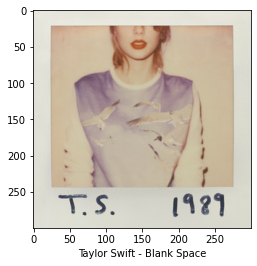

In [ ]:
# import das bibliotecas gráficas
import matplotlib.pyplot as plt
from skimage import io

# definição do nome da música (teste)
nome_musica = 'Taylor Swift - Blank Space'

# coleta do id da música correspondente
id = projection_kmeans\
          .filter(projection_kmeans.artists_song == nome_musica)\
          .select('id').collect()[0][0]

# coleta de informações referentes a essa música diretamente da API do Spotify
track = sp.track(id)
url = track["album"]["images"][1]["url"]
music_name = track['album']['artists'][0]["name"]+' - '+track['name']

# leitura do url da imagem e apresentação do resultado com as bibliotecas gráficas
image = io.imread(url)
plt.imshow(image)
plt.xlabel(music_name, fontsize = 10)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from skimage import io

# definição de uma função para apresentação de fotografia dos álbuns musicas 
# com todas as modificações cosméticas já aplicadas
def visualize_songs(name,url):
    # parâmetros de entrada: listas com nomes de música e urls de imagem (álbum)
 
    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(False)
    plt.show()



In [ ]:
# exemplo e teste de funcionamento: 
musicas_recomendadas, playlist_track = recomendador(nome_musica)

In [ ]:
# construo as listas necessárias
url_albuns = []
music_names = []

for data in playlist_track:
  url = data["album"]["images"][1]["url"]
  name = data['album']['artists'][0]["name"]+' - '+track['name']

  url_albuns.append(url)
  music_names.append(name)


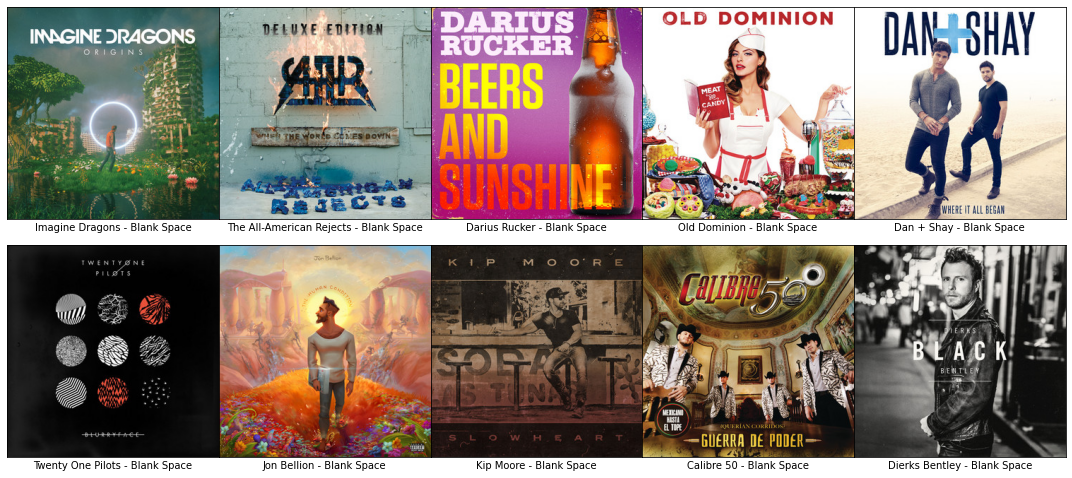

In [ ]:
visualize_songs(music_names,url_albuns)

In [ ]:
# Por fim, aplico essa função construída no nosso recomendador
# para agilizar o processo, colocamos todos esses tratamentos numa úncia função
def recomendador(nome_musica):

  resultado = projection_kmeans.select('artists_song').filter(f.col('artists_song') == nome_musica).collect()
  # esse comando tem que me retornar uma lista de rows (linhas que correspondem ao filtro aplicado)

  if len(resultado) == 1: # mas se a música está na base, ela deve corresponder a um único registro (por isso len = 1)

    cluster = projection_kmeans.filter(projection_kmeans.artists_song == nome_musica).select('cluster_pca').collect()[0][0]
    musicas_recomendadas = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                       .select('artists_song', 'id', 'pca_features')
    componenetes_musica = musicas_recomendadas.filter(musicas_recomendadas.artists_song == nome_musica)\
                                          .select('pca_features').collect()[0][0]

    def calcula_distance(value):
      return euclidean(componenetes_musica, value)

    udf_calcula_distance = f.udf(calcula_distance, FloatType())

    musicas_recomendadas_dist = musicas_recomendadas.withColumn('Dist', udf_calcula_distance('pca_features'))

    recomendadas = spark\
                      .createDataFrame(musicas_recomendadas_dist.filter(f.col('artists_song') != nome_musica).sort('Dist').take(10))\
                      .select(['artists_song', 'id', 'Dist'])\

    #recomendadas.select('artists_song').show(truncate=False)
  
    # -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- 
    # extração de informações da API
    id_musicas_recomendadas = recomendadas.select('id').collect() # coleta dos id's de todas as músicas recomendadas
    playlist_track = [] # definição de uma lista auxiliar para guardar os dados da api

    for row_id in id_musicas_recomendadas: # para cada id do collect
      playlist_track.append(sp.track(row_id[0])) # acrescento as informações da api na lista definida
    
    # -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- x -- 
    # apresentação das recomendações 

    url_albuns = []
    music_names = []

    for data in playlist_track:
      url = data["album"]["images"][1]["url"]
      name = data['album']['artists'][0]["name"]+' - '+track['name']

      url_albuns.append(url)
      music_names.append(name)


    # visualize_songs
    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url_albuns):
        ax = plt.subplot(len(url_albuns) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
        plt.xlabel(music_names[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(False)
    plt.show()

  else:
    print('A música incluída não está no nosso inventário')



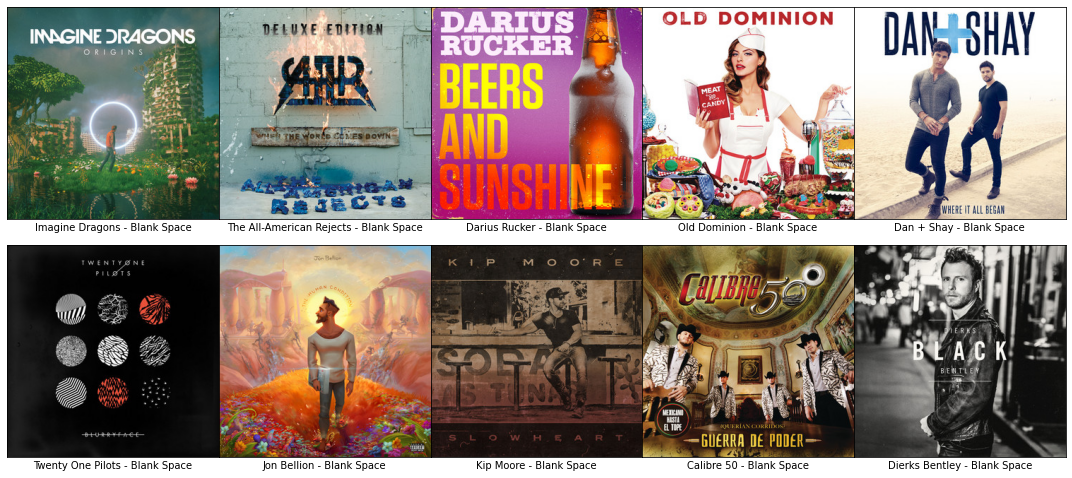

In [ ]:
recomendador('Taylor Swift - Blank Space')